In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
plt.style.use('seaborn-v0_8-paper')
pt = 1./72.27
fig_width = 241 * pt
aspect_ratio = (1 + 8 ** 0.5) / 2
plt.rcParams["figure.figsize"] = (fig_width, fig_width/aspect_ratio)
plt.rcParams["savefig.bbox"] = "tight"
sns.set_theme(style='whitegrid', context='paper', rc={'axes.facecolor': 'white', 'figure.figsize': (fig_width, fig_width/aspect_ratio)})

colors = ["#00a1de", "#009b3a", "#c60c30", "#f9461c", "#532A92"]

In [3]:
df = pd.read_csv("EnergyAwarenessAggregatedResponses.csv")
df

,QuestionId,Question,Response,Count
0,Q46,Do you regularly look at the feedback provided?,Yes,39.000000
1,Q46,Do you regularly look at the feedback provided?,No,32.000000
2,Q14,Are you aware of how many node-hours your work...,Yes,148.000000
3,Q14,Are you aware of how many node-hours your work...,No,55.000000
4,Q15,Have you taken steps to reduce the amount of n...,Yes,142.000000
...,...,...,...,...
153,Q50_1,Can you estimate the average GPU utilization? ...,<median>,80.000000
154,Progress,Progress,<mean>,67.898734
155,Progress,Progress,<median>,100.000000
156,Q37_4,Can you estimate the average memory utilizatio...,<mean>,49.712871


/tmp/ipykernel_18542/2093040107.py:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.histplot(data=df1, x="Question", hue="Response", multiple="stack", weights="Count", stat="count", ax=ax, palette=colors, shrink=0.7)
/tmp/ipykernel_18542/2093040107.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Green500", "SPEC SERT", "Carbon\nIntensity", "PUE"], rotation=20)


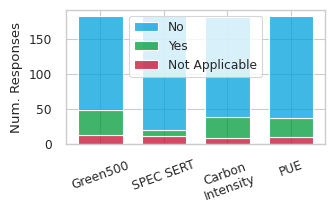

<Figure size 333.472x174.208 with 0 Axes>

In [4]:
df1 = df[df["QuestionId"].isin(["Q20_1", "Q20_2", "Q20_3", "Q20_4"])]
fig, ax = plt.subplots(1,1)
sns.histplot(data=df1, x="Question", hue="Response", multiple="stack", weights="Count", stat="count", ax=ax, palette=colors, shrink=0.7)
# sns.move_legend(ax, "center left", bbox_to_anchor=(1, 0))
ax.set_xticklabels(["Green500", "SPEC SERT", "Carbon\nIntensity", "PUE"], rotation=20)
ax.set_xlabel(None)
ax.set_ylabel("Num. Responses")
ax.get_legend().set_title(None)
plt.show()
plt.savefig("figures/use_of_tools.pdf")

/tmp/ipykernel_18542/2055134896.py:14: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.histplot(data=df1, x="QuestionId", hue="Response", hue_order=["1 (Not Important)", "2", "3 (Very Important)"], weights="Count", multiple="stack", stat="count", ax=ax, palette=colors, shrink=0.75)
/tmp/ipykernel_18542/2055134896.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=30, ha='right')


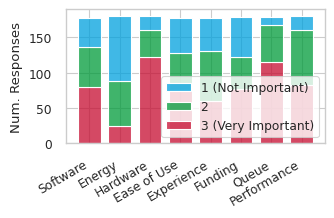

In [5]:
question_map = {
    "Q22_3": "Hardware",
    "Q22_2": "Queue",
    "Q22_4": "Performance",
    "Q22_1": "Funding",
    "Q22_6": "Software",
    "Q22_7": "Ease of Use",
    "Q22_8": "Experience",
    "Q22_5": "Energy",   
}
df1 = df[df["QuestionId"].isin(list(question_map.keys()))]
df1.loc[df1["Response"] == "1 (Not important)", "Response"] = "1 (Not Important)"
fig, ax = plt.subplots(1,1)
sns.histplot(data=df1, x="QuestionId", hue="Response", hue_order=["1 (Not Important)", "2", "3 (Very Important)"], weights="Count", multiple="stack", stat="count", ax=ax, palette=colors, shrink=0.75)
labels = [question_map[item.get_text()] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=30, ha='right')
ax.set_xlabel(None)
ax.set_ylabel("Num. Responses")
ax.get_legend().set_title(None)
plt.savefig("figures/selection_priority.pdf")
plt.show()